In [21]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime
import random
import numpy as np
import seaborn as sns
import plotly.express as px

In [22]:
tickers = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'HCLTECH.NS', 'ASIANPAINT.NS', 'HINDUNILVR.NS','BRITANNIA.NS']
df = pd.DataFrame()
Opening = pd.DataFrame()
Closing = pd.DataFrame()
today = datetime.date.today()
#prev = datetime.timedelta(3954)
#3954 is for 10 year returns and the given shares increase 10 times with random allocation in portfolio 
#while just  3 times in the last 5 years
prev = datetime.timedelta(2000)
stock = []
for i in range(len(tickers)):
  try:
    temp = web.get_data_yahoo(tickers[i], today - prev)
    temp.dropna(inplace=True)
    df[tickers[i]] = temp['Volume']
    Opening[tickers[i]] = temp['Open']
    Closing[tickers[i]] = temp['Close']
    stock.append(tickers[i])
  except:
    print("No info is available for this particular stock " + tickers[i])

In [23]:
Closing

,RELIANCE.NS,TCS.NS,HDFCBANK.NS,HCLTECH.NS,ASIANPAINT.NS,HINDUNILVR.NS,BRITANNIA.NS
Date,,,,,,,
2015-05-08,444.850006,1263.619995,491.000000,462.750000,759.400024,895.200012,1101.699951
2015-05-11,447.975006,1278.000000,495.149994,470.950012,771.650024,864.700012,1141.599976
2015-05-12,434.350006,1261.449951,485.975006,457.825012,758.349976,843.950012,1136.199951
2015-05-13,442.549988,1257.699951,495.125000,468.649994,762.500000,841.049988,1141.300049
2015-05-14,439.100006,1249.619995,495.524994,462.649994,796.450012,846.450012,1129.150024
...,...,...,...,...,...,...,...
2020-10-22,2106.949951,2671.149902,1233.300049,866.250000,2099.899902,2179.350098,3458.350098
2020-10-23,2113.050049,2686.800049,1235.800049,852.450012,2120.250000,2143.850098,3469.750000
2020-10-26,2029.099976,2688.199951,1210.900024,847.799988,2080.449951,2166.750000,3485.399902


In [24]:
def normalize_values(df):
  x = df.copy()
  for i in Closing.columns:
    x[i] = x[i] / x[i][0]
  return x

In [25]:
def plot_chart(df, title):
  fig = px.line(title = title)
  for i in df.columns:
    fig.add_scatter(x = df.index,y = df[i], name = i)
  fig.show()

In [26]:
plot_chart(Closing,"Price Chart for stocks")

In [27]:
plot_chart(normalize_values(Closing), "Normalised Values for Stocks")

The chart above shows the normalised prices for stocks. It shows that if we had started with Rs 1 on May 2015 we would've multiplied it by the factor that you see today.

In [28]:
np.random.seed(24)
weights = np.array(np.random.random(7))
weights = weights / np.sum(weights)
weights

array([0.19289785, 0.1405541 , 0.20090497, 0.04421848, 0.07254764,
       0.14865746, 0.20021948])

We randomly allocate weights to the stocks in our portfolio. All of these should add to 1.

In [29]:
df_portfolio = normalize_values(Closing)
df_portfolio

,RELIANCE.NS,TCS.NS,HDFCBANK.NS,HCLTECH.NS,ASIANPAINT.NS,HINDUNILVR.NS,BRITANNIA.NS
Date,,,,,,,
2015-05-08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-05-11,1.007025,1.011380,1.008452,1.017720,1.016131,0.965929,1.036217
2015-05-12,0.976397,0.998283,0.989766,0.989357,0.998617,0.942750,1.031315
2015-05-13,0.994830,0.995315,1.008401,1.012750,1.004082,0.939511,1.035945
2015-05-14,0.987074,0.988921,1.009216,0.999784,1.048788,0.945543,1.024916
...,...,...,...,...,...,...,...
2020-10-22,4.736315,2.113887,2.511813,1.871961,2.765209,2.434484,3.139103
2020-10-23,4.750028,2.126272,2.516904,1.842139,2.792007,2.394828,3.149451
2020-10-26,4.561313,2.127380,2.466191,1.832091,2.739597,2.420409,3.163656


Let's say we start with 1000000 on the May of 2015. We determine how much our portfolio performs on a daily basis and what is the value of our portfolio today.

In [30]:
for counter, stock in enumerate(df_portfolio.columns):
  df_portfolio[stock] = df_portfolio[stock] * weights[counter]
  df_portfolio[stock] = df_portfolio[stock] * 1000000
df_portfolio

,RELIANCE.NS,TCS.NS,HDFCBANK.NS,HCLTECH.NS,ASIANPAINT.NS,HINDUNILVR.NS,BRITANNIA.NS
Date,,,,,,,
2015-05-08,192897.850263,140554.102722,200904.973926,44218.483244,72547.644987,148657.462789,200219.482070
2015-05-11,194252.926747,142153.609450,202603.048092,45002.042622,73717.922340,143592.614093,207470.786941
2015-05-12,188344.793277,140312.725899,198848.871548,43747.871704,72447.330834,140146.856373,206489.403498
2015-05-13,191900.506031,139895.608501,202592.821212,44782.262350,72843.794474,139665.276541,207416.279196
2015-05-14,190404.509533,138996.864434,202756.488754,44208.927073,76087.135736,140562.007905,205208.171995
...,...,...,...,...,...,...,...
2020-10-22,913625.066013,297115.492958,504635.670372,82775.280626,200609.412332,361904.213169,628509.663299
2020-10-23,916270.217656,298856.279195,505658.608121,81456.610656,202553.515061,356009.061408,630581.445676
2020-10-26,879867.411236,299011.992161,495470.138150,81012.273483,198751.303157,359811.833229,633425.609677


In [31]:
df_portfolio['Portfolio_Value_in_₹'] = df_portfolio.sum(axis=1)
#df_portfolio

In [32]:
df_portfolio['Daily_Return_in_Percentage'] = df_portfolio['Portfolio_Value_in_₹'].pct_change(1) * 100
df_portfolio['Daily_Return_in_Percentage'][0] = 0
df_portfolio['Cummulative_Return'] = ((df_portfolio['Portfolio_Value_in_₹'] - df_portfolio['Portfolio_Value_in_₹'][0]) / df_portfolio['Portfolio_Value_in_₹'][0]) + 1
df_portfolio

,RELIANCE.NS,TCS.NS,HDFCBANK.NS,HCLTECH.NS,ASIANPAINT.NS,HINDUNILVR.NS,BRITANNIA.NS,Portfolio_Value_in_₹,Daily_Return_in_Percentage,Cummulative_Return
Date,,,,,,,,,,
2015-05-08,192897.850263,140554.102722,200904.973926,44218.483244,72547.644987,148657.462789,200219.482070,1.000000e+06,0.000000,1.000000
2015-05-11,194252.926747,142153.609450,202603.048092,45002.042622,73717.922340,143592.614093,207470.786941,1.008793e+06,0.879295,1.008793
2015-05-12,188344.793277,140312.725899,198848.871548,43747.871704,72447.330834,140146.856373,206489.403498,9.903379e+05,-1.829424,0.990338
2015-05-13,191900.506031,139895.608501,202592.821212,44782.262350,72843.794474,139665.276541,207416.279196,9.990965e+05,0.884415,0.999097
2015-05-14,190404.509533,138996.864434,202756.488754,44208.927073,76087.135736,140562.007905,205208.171995,9.982241e+05,-0.087323,0.998224
...,...,...,...,...,...,...,...,...,...,...
2020-10-22,913625.066013,297115.492958,504635.670372,82775.280626,200609.412332,361904.213169,628509.663299,2.989175e+06,-0.055141,2.989175
2020-10-23,916270.217656,298856.279195,505658.608121,81456.610656,202553.515061,356009.061408,630581.445676,2.991386e+06,0.073965,2.991386
2020-10-26,879867.411236,299011.992161,495470.138150,81012.273483,198751.303157,359811.833229,633425.609677,2.947351e+06,-1.472066,2.947351


**Portfolio_Value_in_₹: How much money we have in our portfolio on a daily basis.**


**Daily_Return_in_Percentage: Tells you about the daily returns we obtain in our portfolio**

**Cummulative_Return: Tells you how many times your money is multiplied given you start with 1.**


In [33]:
fig = px.line(x = df_portfolio.index, y = df_portfolio['Daily_Return_in_Percentage'], title = 'Plot for Daily Return in %')
fig.show()

In [34]:
plot_chart(df_portfolio.drop(['Portfolio_Value_in_₹','Daily_Return_in_Percentage',
                              'Cummulative_Return'],axis=1),title='Your Money Over Time')

## Histogram for Daily Returns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



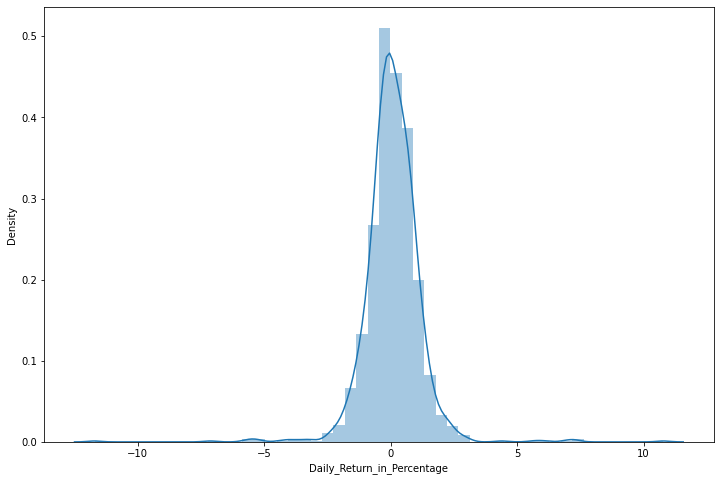

In [35]:
plt.figure(figsize=(12,8))
sns.distplot(df_portfolio['Daily_Return_in_Percentage']);

In [36]:
px.line(x = df_portfolio.index, y = df_portfolio['Portfolio_Value_in_₹'], title = 'Plot for Portfolio Value Over Time')

## Calculate Sharpe Ratio

In [37]:
sharpe_ratio = df_portfolio['Daily_Return_in_Percentage'].mean() / df_portfolio['Daily_Return_in_Percentage'].std() * np.sqrt(252)
sharpe_ratio

1.2245213111827822